# Build a multiple linear regression

## PACE: **Plan**



In [1]:
# Operational packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversion
import datetime as dt
from datetime import date
from datetime import timedelta

# Packages for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
df0 = pd.read_csv(r'C:\Users\user\Desktop\2017_Yellow_Taxi_Trip_Data.csv', index_col= 0)

## PACE: **Analyze**

* Here are some purposes of EDA before constructing a multiple linear regression model:

1.   Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

2.   EDA activities also include identifying missing data to help us make decisions on our exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

3.   It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help us decide what statistical inferences can be made from the model and which ones cannot.

4.  Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. For example, in this dataset we can create a `duration` variable by subtracting `tpep_dropoff` from `tpep_pickup time`.

### Data exploration

In [3]:
# Keep `df0` as the original dataframe and create a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df= df0.copy()
df.shape

(22699, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###

# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 17)
Shape of dataframe with duplicates dropped: (22699, 17)
Total count of missing values: 0
Missing values per column:


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [6]:
# Check for duplicates
print("Shape pf data:", df.shape)
print("Shape of data with duplicates dropped:", df.drop_duplicates().shape)

#Check for missing values in data
print("Total count of missing values:", df.isna().sum().sum())

Shape pf data: (22699, 17)
Shape of data with duplicates dropped: (22699, 17)
Total count of missing values: 0


In [7]:
# Display descriptive stats about the data
df.describe(include = 'all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


 Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in several variables, like `tip_amount` (\$200) and `total_amount` (\$1,200). Also, a number of the variables, such as `mta_tax`, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

In [9]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


In [10]:
# Create duration column
df['duration']= (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1, 'm')

df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000


In [11]:
# Check the data type of the newly created column
df['duration'].dtype

dtype('float64')

## Outliers
 Keeping in mind that many of the features will not be used to fit the model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



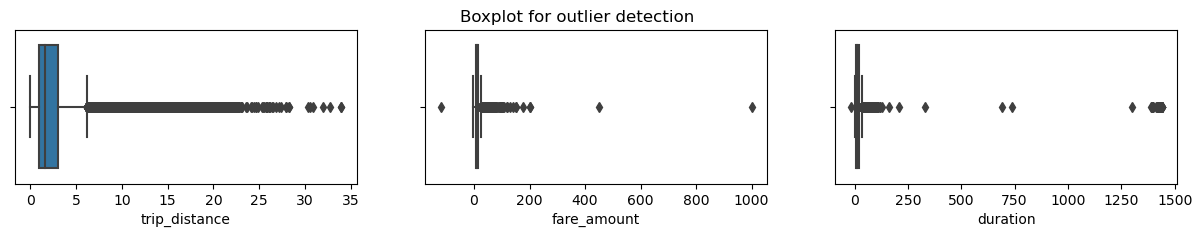

In [12]:
fig, axes= plt.subplots(1,3, figsize= (15,2))
fig.suptitle('Boxplot for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show()

**Note** 
1. All three variables contain outliers. Some are extreme, but others not so much.

2. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

3. Probably not for the latter two, but for `trip_distance` it might be okay.

#### `trip_distance` outliers

We know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
sum(df['trip_distance']==0)

148

**Note:** 148 out of ~23,000 `(0.652 %)` rides is relatively insignificant. We could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

#### `fare_amount` outliers

In [16]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**NOTE**
The range of values in the `fare_amount` column is large and the extremes don't make much sense.

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \$1,000, which seems very unlikely.

High values for this feature can be removed based on intuition and statistics. The interquartile range (IQR) is \$8.

The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a fare of $62.50.

Impute values less than $0 with `0`.

In [17]:
# Impute values less than $0 as 0
df.loc[df['fare_amount'] < 0, 'fare_amount']= 0
df['fare_amount'].min()

0.0

In [18]:
# Impute extreme values as `Q3+(6*IQR)`
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        q1= df[col].quantile(0.25)
        q3= df[col].quantile(0.75)
        iqr= q3-q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())

In [19]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers

In [20]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Handle maximum outliers the same way it was done for fares: `Q3 + (6 * IQR)`.

In [22]:
# Impute 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [23]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


## Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we *do* know to generalize about ones we do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.



In [24]:
# Create pickup_dropoff column
df['pickup_dropoff']= df['PULocationID'].astype("string") + " " + df['DOLocationID'].astype('string')
df['pickup_dropoff'].head(3)

24870114     100 231
35634249      186 43
106203690    262 236
Name: pickup_dropoff, dtype: string

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [25]:
grouped= df.groupby('pickup_dropoff').mean()[['trip_distance']]

In [26]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped.head(5)

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the `to_dict()`method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information we want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [27]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the `map()` method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.

When we pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary.

In [28]:
# Create a mean distance column that is a copy of the pickup_dropoff column
df['mean_distance']= df['pickup_dropoff']

# Map 'grouped_dict' to the mean_distance column
df['mean_distance']= df['mean_distance'].map(grouped_dict)

# Confirm that it worked

df[(df['PULocationID']==100) & (df['DOLocationID']==231)] [['mean_distance']]

,mean_distance
24870114,3.521667
96629892,3.521667
48945131,3.521667
50574134,3.521667
7282051,3.521667
49385419,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [30]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
24870114,22.847222
96629892,22.847222
48945131,22.847222
50574134,22.847222
7282051,22.847222
49385419,22.847222


In [31]:
# Create day column
df['day']= df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create month column
df['month']= df['tpep_pickup_datetime'].dt.strftime('%b').str.upper()

In [32]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,MAR
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,APR
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,DEC
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,MAY
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,APR


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [33]:
# Create rush hour column
df['rush_hour']= df['tpep_pickup_datetime'].dt.hour

# If day is saturday or sunday, impute 0 in rush hour column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour']= 0

In [34]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] <10:
        val= 1
    elif 16<= hour['rush_hour'] < 20:
            val= 1 
    else:
         val= 0
    return val

In [35]:
# Apply the rush_hourizer() to the new column
df['rush_hour']= df.apply(rush_hourizer, axis=1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,MAR,0
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,APR,0
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,DEC,1
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,MAY,0
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,APR,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

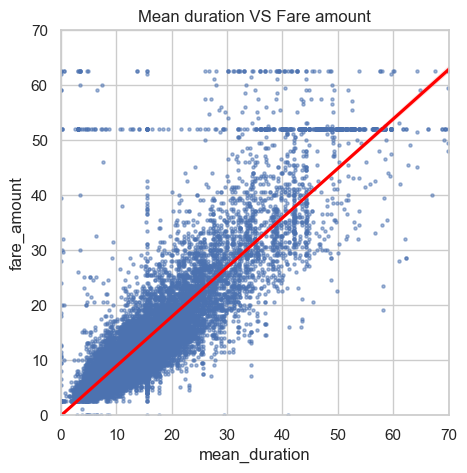

In [36]:
sns.set(style= 'whitegrid')
fig= plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
           scatter_kws={'alpha':0.5, 's':5},
           line_kws= {'color': 'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title("Mean duration VS Fare amount")
plt.show()

The `mean_duration` variable correlates with the target variable. But there are some horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

We know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50.

Check the value of the rides in the second horizontal line in the scatter plot.

In [37]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head(7)

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
Name: fare_amount, dtype: int64

**Note:** There are 514 trips whose fares were \$52, which means that 514 were outliers before replacing them.

Examine the first 30 of these trips.

In [38]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,MAR,0
47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,JUN,0
95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,NOV,0
103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,DEC,0
80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,SEP,0
16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,FEB,1
55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,JUN,0
65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,AUG,0
80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,SEP,0
33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,APR,0


### Quick Insight
It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and $5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.


The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for 'new york city taxi flat rate '$52'' indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way we know that those data points will always be correct.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64    

In [41]:
# Duplicate df for modelling purpose
df2= df.copy()
df2= df2.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


In [42]:
df2.head(3)

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
24870114,2,6,13.0,3.521667,22.847222,0
35634249,1,1,16.0,3.108889,24.470370,0
106203690,1,1,6.5,0.881429,7.250000,1


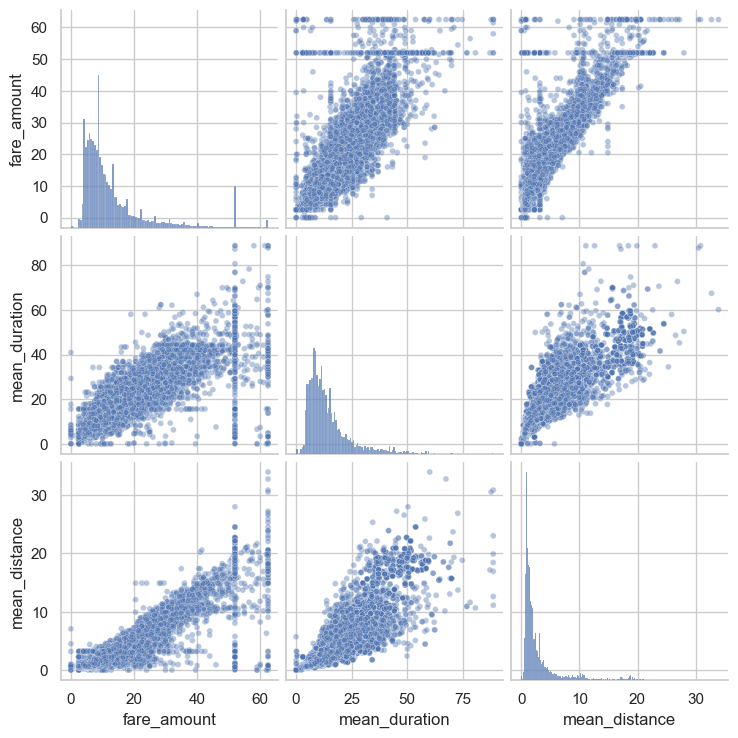

In [44]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']], 
            plot_kws= {'alpha':0.4, 'size':5});

These variables all show linear correlation with each other. Let's investigate this further.

In [45]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


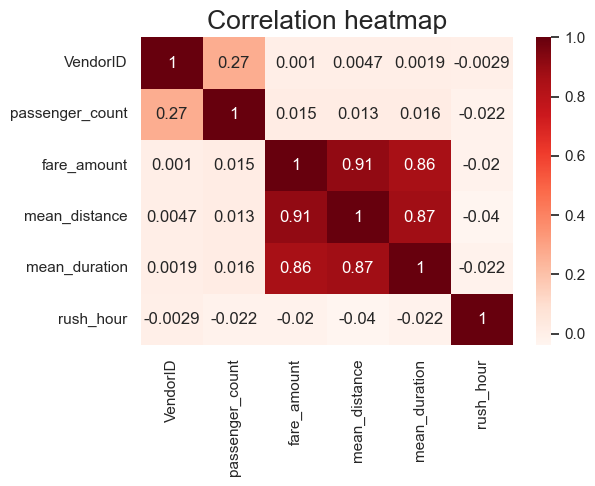

In [46]:
# Create correlation heatmap
plt.figure(figsize=  (6,4))
sns.heatmap(df2.corr(method= 'pearson'), annot= True, cmap= 'Reds')
plt.title("Correlation heatmap", fontsize= 19)
plt.show()

**Quick Insight:** `mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when we want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about the data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, we will try modeling with both variables even though they are correlated.

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### Split data into outcome variables and features

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


In [48]:
# Remove the target column from the features
x= df2.drop(columns =['fare_amount'], axis= 1)

#Set y variable
y=df2[['fare_amount']]

### Pre-process the data
 **Dummy encode categorical variables**

In [49]:
# Convert VendorID to string
x['VendorID']= x['VendorID'].astype('string')

# Get dummies
z= pd.get_dummies(x, drop_first= True)
z.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
24870114,2,6,3.521667,22.847222,0
35634249,1,1,3.108889,24.470370,0
106203690,1,1,0.881429,7.250000,1
38942136,2,1,3.700000,30.250000,0
30841670,2,1,4.435000,14.616667,0


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the z variables. Assign the results to a variable called `x_scaled`.

In [50]:
# Standardize the x variables
scaler= StandardScaler()
x_scaled= scaler.fit_transform(z)
print('x_scaled:', x_scaled)

x_scaled: [[ 0.8931955   3.39065627  0.17093801  0.83195364 -0.64959666]
 [-1.11957573 -0.4997803   0.05495383  0.99296921 -0.64959666]
 [-1.11957573 -0.4997803  -0.57092814 -0.7152838   1.53941679]
 ...
 [ 0.8931955  -0.4997803  -0.62633441 -0.77886169 -0.64959666]
 [ 0.8931955  -0.4997803  -0.23485053  0.21719198 -0.64959666]
 [-1.11957573 -0.4997803  -0.40359028 -0.50145366 -0.64959666]]


### Split data into training and test sets
Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [51]:
# Create traininh and testing sets
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size= 0.2, random_state= 0)

In [52]:
# Fit the model to the training data
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Evaluate model


### Train data

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [53]:
# Evaluate the model performance on the training data

r_sq = lr.score(x_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(x_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.1866664167754166
MSE: 17.88973296349268
RMSE: 4.229625629236313


### Test data

In [54]:
# Evaluate the model performance on the testing data

r_sq_test = lr.score(x_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(x_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795453
R^2: 0.8682583641795453
MAE: 2.1336549840593904
MSE: 14.32645415699896
RMSE: 3.7850302716093247


**Quick Insight:** The model performance is high on both training and test sets, suggesting that there is no bias in the model and that the model is not overfit. In fact, the test scores were somewhat better.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.


## PACE: **Execute**

**Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.**

In [55]:
# Create a `results` dataframe

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
102188254,14.0,12.356503,1.643497
50574134,28.0,16.314595,11.685405
14767643,5.5,6.726789,-1.226789
16019414,15.5,16.227206,-0.727206
1352127,9.5,10.536408,-1.036408


### Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

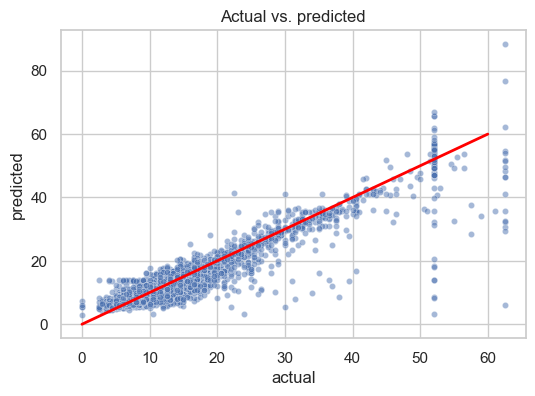

In [57]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 4))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram

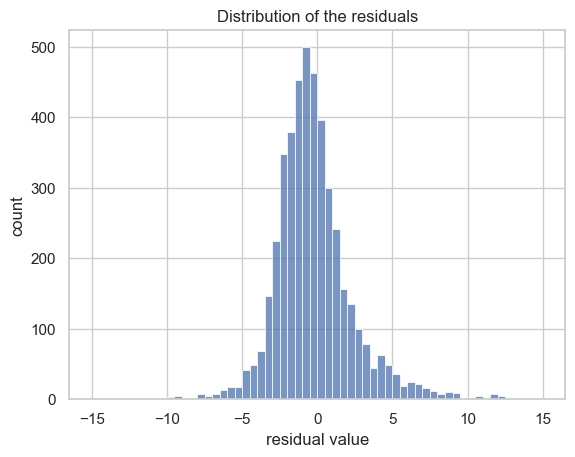

In [58]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [59]:
results['residual'].mean()

-0.015442621528681129

**Quick Insight:** The distribution of the residuals is normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the models errors are evenly distributed and unbiased.

Create a scatterplot of `residuals` over `predicted`.

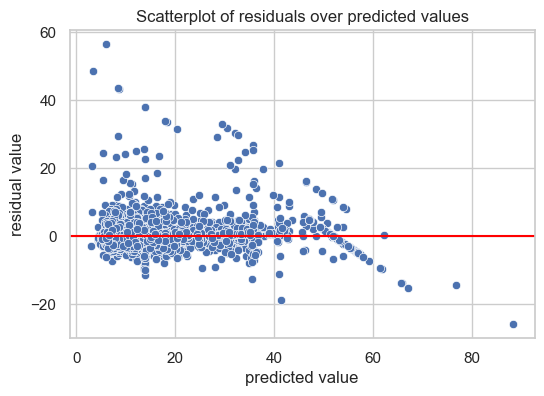

In [63]:
# Create a scatterplot of `residuals` over `predicted`
plt.figure(figsize= (6,4))
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

**Quick Insight:** The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which we know are the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

### Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model.

In [67]:
# Get model coefficient
coeff= pd.DataFrame(lr.coef_, columns= x.columns)
coeff

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.054376,0.030755,7.102335,2.806779,0.110278


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of \\$7. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.